# 03b - Vertex AI + BQML - Online Predictions with BQML Models

* Models built with BigQuery ML (BQML), like the one in (03a), can also be exported for use and deployment outside of BigQuery. 
* A Vertex AI Endpoint can be used for online predictions with an exported model. This demonstration shows the process of exporting and deploying a BQML model with Vertex AI.



----
## Prerequisites:
* 03a - BigQuery Machine Learning (BQML) - Machine Learning with SQL
----
## Overview:
* Export the BigQuery ML model built in (03a) to a GCS bucket URI
    * EXPORT MODEL …
* Use Python Client google.cloud.aiplatform for Vertex AI
    * Upload Model
        * Model - aiplatform.Model.upoad
    * Create Endpoint
        * Endpoint - aiplatform.Endpoint.create
    * Deploy to Endpoint
        * Endpoint.deploy(model=Model)
    * Online Predictions
        * Endpoint.predict


----
## Set up

Input

In [3]:
REGION = 'us-central1'
PROJECT_ID='nguyen-demo5'
DATANAME = 'taxi'
NOTEBOOK = '03b'

# Resources
DEPLOY_IMAGE='us-docker.pkg.dev/vertex-ai/prediction/tf2-cpu.2-3:latest'
DEPLOY_COMPUTE = 'n1-standard-4'

# Model Training
VAR_TARGET = 'tips_label'
#  Based on the best result among the models, we selected the logistic regression model VERSION 4: taxi_lr_v4 for our online prediction.
VAR_OMIT= 'unique_key taxi_id trip_start_timestamp trip_end_timestamp trip_miles pickup_census_tract dropoff_census_tract pickup_community_area dropoff_community_area tips extras trip_total pickup_latitude pickup_longitude dropoff_latitude dropoff_longitude' # add more variables to the string with space delimiters

Packages:

In [4]:
from google.cloud import aiplatform
from datetime import datetime

from google.cloud import bigquery
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
import json
import numpy as np

Clients:

In [6]:
aiplatform.init(project=PROJECT_ID, location=REGION)
bigquery = bigquery.Client()

Parameters:

In [7]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
BUCKET = PROJECT_ID
URI = f"gs://{BUCKET}/{DATANAME}/models/{NOTEBOOK}"
params = {"URI": URI}
DIR = f"temp/{NOTEBOOK}"

Enviroments:

In [9]:
!rm -rf {DIR}
!mkdir -p {DIR}

----
## Export the BigQuery Model
Export the BigQuery Model:

In [10]:
export = bigquery.query(query = f"EXPORT MODEL {DATANAME}.{DATANAME}_lr_v4 OPTIONS(URI = '{URI}')")

In [11]:
export.result()

### New exported Model inside the bucket
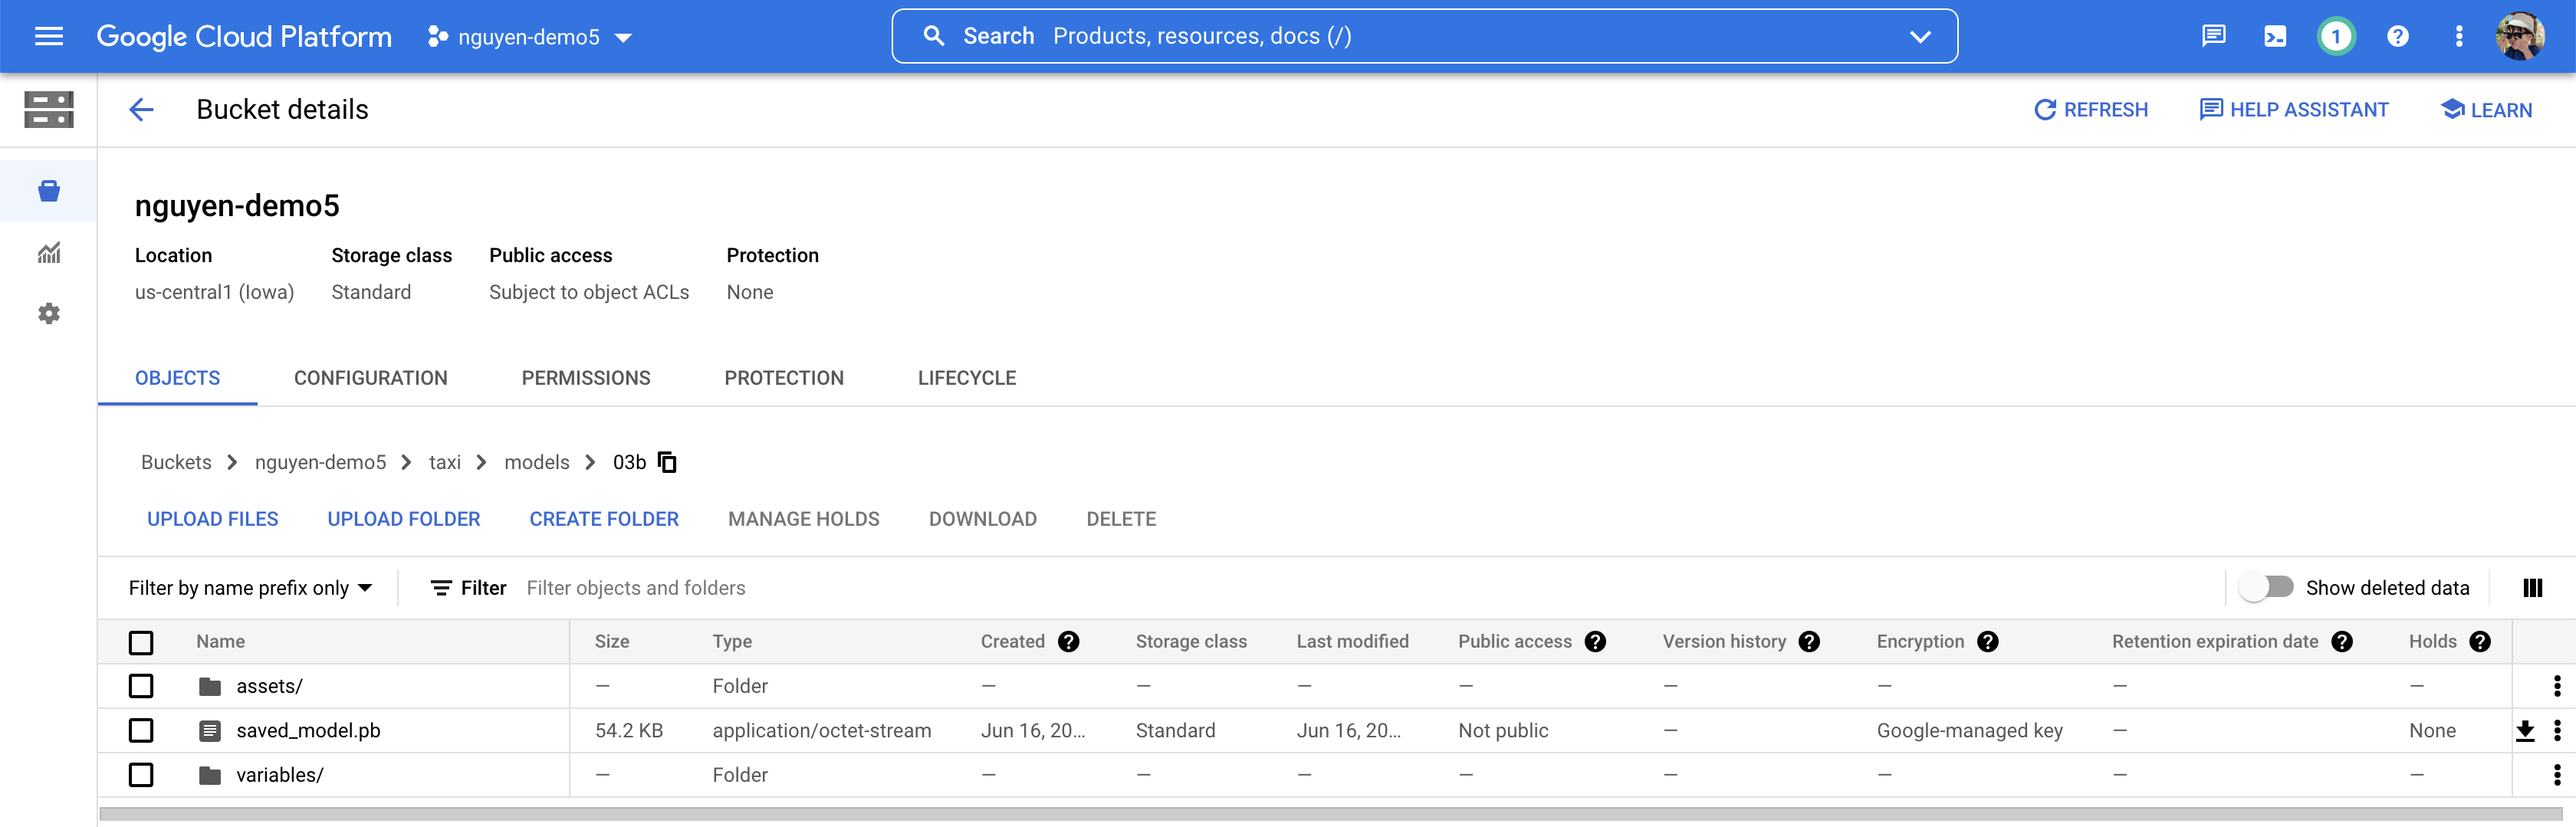


----
## Serving
### Upload The Model

In [13]:
model = aiplatform.Model.upload(
    display_name = f'{NOTEBOOK}_{DATANAME}_{TIMESTAMP}',
    serving_container_image_uri = DEPLOY_IMAGE,
    artifact_uri = URI,
    labels = {'notebook':f'{NOTEBOOK}'}
)

Creating Model
Create Model backing LRO: projects/716133108361/locations/us-central1/models/8786228203883593728/operations/4593756900788535296
Model created. Resource name: projects/716133108361/locations/us-central1/models/8786228203883593728
To use this Model in another session:
model = aiplatform.Model('projects/716133108361/locations/us-central1/models/8786228203883593728')


In [14]:
model.display_name

'03b_taxi_20220616195943'

#### Newly model was uploaded to VertexAI/Models from bucket.
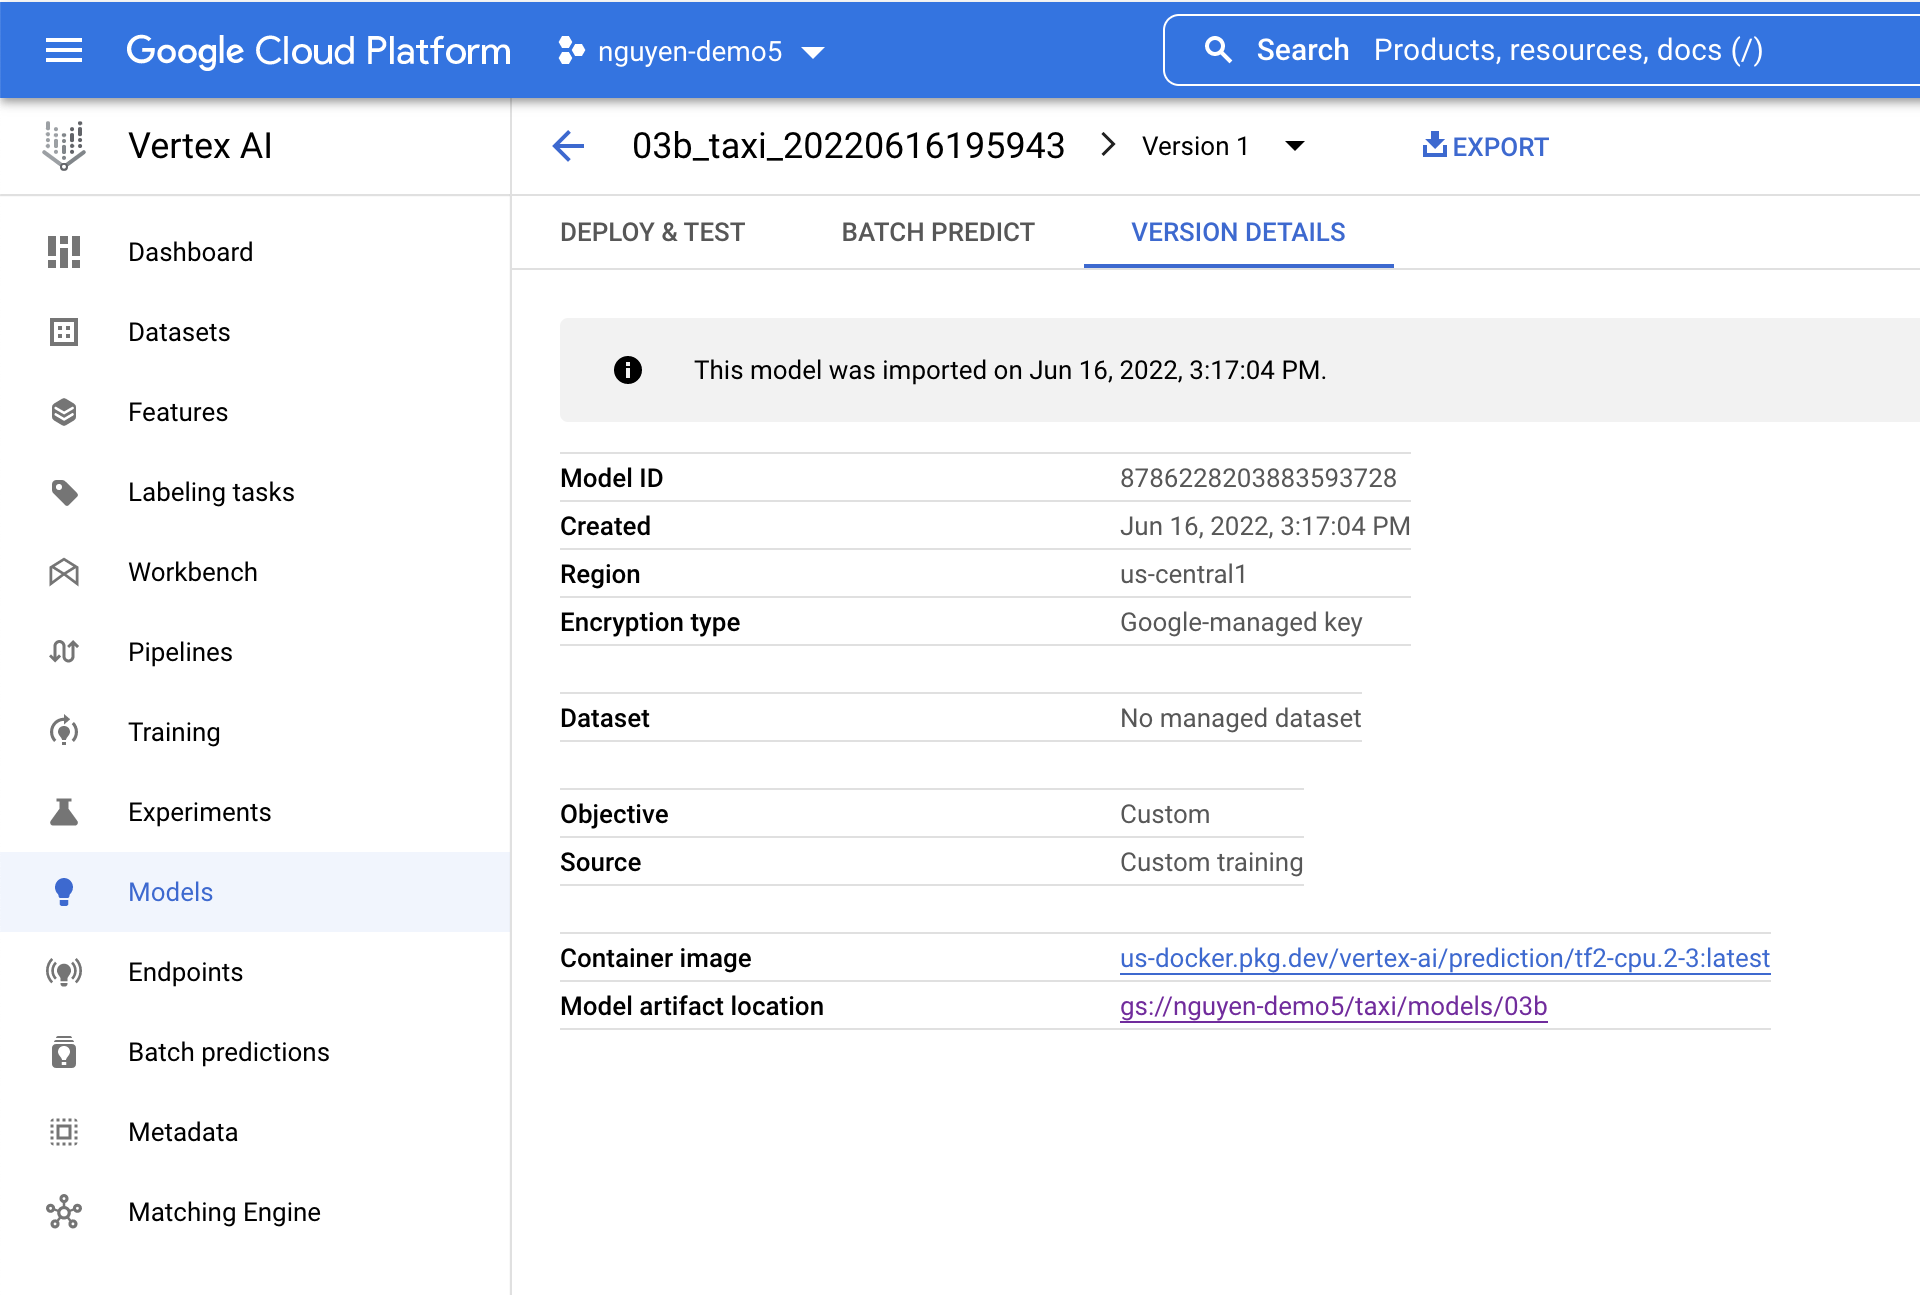